# Numbat tests

Verifying the results generated by the Numbat tests

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erfc
import matplotlib.pyplot as plt
%matplotlib inline

## Kernel testing

### Diffusion kernel

Test that the correct behaviour is observed using the *NumbatDiffusion* kernel for both steady and transient analysis (the tranisent analysis also uses the *NumbatTimeDerivative* kernel).

#### Steady

In this test, Direchlet boundary conditions are applied to set the concentration at the top and bottom boundaries to 1 and 0, respectively. A steady executioner is used, and the resulting concentration profile should vary linearly from 1 at the top to 0 at the bottom of the mesh. (Note: plot the data in the -*y* direction, ie, starting at y=20 and decreasing to y=0).

In [34]:
steadydata2D = pd.read_csv('../../tests/diffusion/gold/2Dsteady_conc_0001.csv');
steadydata3D = pd.read_csv('../../tests/diffusion/gold/3Dsteady_conc_0001.csv');

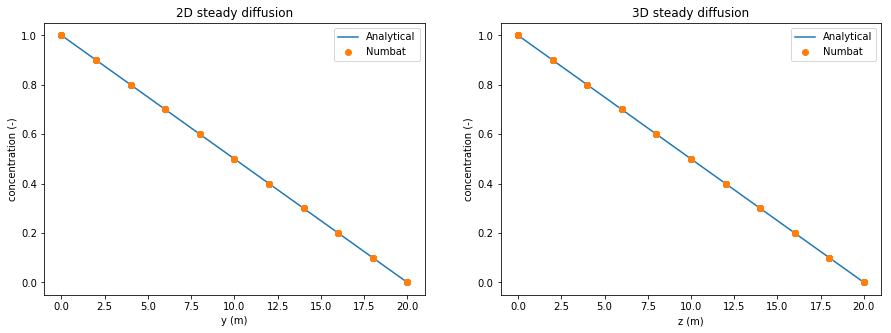

In [36]:
ydata = np.linspace(0,20,100)
cdata = np.linspace(1,0,100)

fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(ydata, cdata, label = 'Analytical')
axes[0].plot(20-steadydata2D.y, steadydata2D.concentration, 'o', label = 'Numbat')
axes[0].legend()
axes[0].set_xlabel('y (m)')
axes[0].set_ylabel('concentration (-)')
axes[0].set_title('2D steady diffusion')

# 3D results
axes[1].plot(ydata, cdata, label = 'Analytical')
axes[1].plot(20-steadydata3D.z, steadydata3D.concentration, 'o', label = 'Numbat')
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('concentration (-)')
axes[1].set_title('3D steady diffusion')

#### Transient

In this test, Direchlet boundary conditions are applied to set the concentration at the top and bottom boundaries to 1 and 0, respectively. A transient executioner is used. An analytical solution to this problem is well known, and the concentration profile is given by $c(z,t) = \mathrm{erfc}(u)$ where $u = z/(2 \sqrt(D t))$ and $\mathrm{erfc}$ is the complimentary error function.

(Note: plot the data in the -*y* direction, ie, starting at y=20 and decreasing to y=0).

In [25]:
phi = 0.1
D = 0.5
t = 10

def c(z,t):
    u = z / (2 * np.sqrt(D * t))
    return erfc(u)

In [42]:
transientdata2D = pd.read_csv('../../tests/diffusion/2Dtransient_conc_0011.csv')
transientdata3D = pd.read_csv('../../tests/diffusion/3Dtransient_conc_0011.csv')

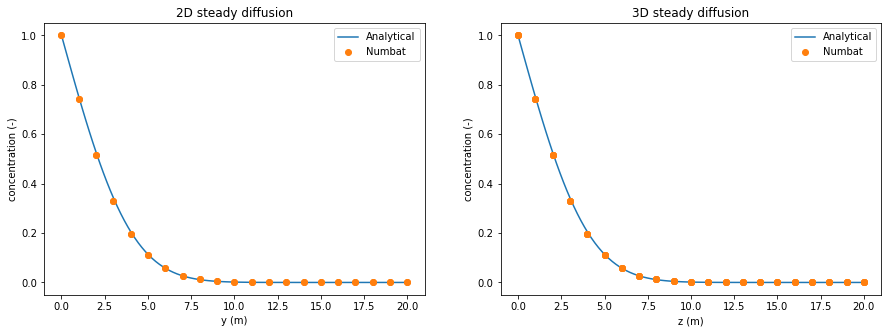

In [43]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(ydata, c(ydata,t), label = 'Analytical')
axes[0].plot(20-transientdata2D.y, transientdata2D.concentration, 'o', label = 'Numbat')
axes[0].legend()
axes[0].set_xlabel('y (m)')
axes[0].set_ylabel('concentration (-)')
axes[0].set_title('2D steady diffusion')

# 3D results
axes[1].plot(ydata, c(ydata,t), label = 'Analytical')
axes[1].plot(20-transientdata3D.z, transientdata3D.concentration, 'o', label = 'Numbat')
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('concentration (-)')
axes[1].set_title('3D steady diffusion')